# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

## A. Explore Environment

### 1. Start the Environment

Run the next code cell to install a few packages. This line will take a few minutes to run!

In [ ]:
!pip -q install ./python

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

## B. Train the agents

### 1. Start the Environment, Examine the State and Action Spaces

In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 2. Import Packages

In [2]:
from ddpg_agent import MultiAgent
import torch
import time
from collections import deque
from matplotlib import pyplot as plt

### 3. Initialize the Agents

In [3]:
agent = MultiAgent(seed=2, noise_start=0.5, update_every=2, gamma=1, t_stop_noise=30000)

### 4. Training Algorithm

In [4]:
def maddpg(agent, n_episodes=100, max_t=700):
    #n_episodes = 6000
    #max_t = 1000
    scores = []
    scores_deque = deque(maxlen=100)
    scores_avg = []
    
    start_time = time.time()     # Start time
    solved = False
    
    #agent_tuple = {"state_size": state_size, "action_size": action_size, "random_seed": 2,}
    #agents = [Agent(**agent_tuple) for _ in range(num_agents)]

    for i_episode in range(1, n_episodes+1):
        rewards = []
        env_info = env.reset(train_mode=False)[brain_name]    # reset the environment    
        #for agent in agents:
        #    agent.reset()
        state = env_info.vector_observations                  # get the current state (for each agent)
        
        # loop over steps
        for t in range(max_t):
            # select an action
            action = agent.act(state)
            # take action in environment and set parameters to new values
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards_ = env_info.rewards
            done = env_info.local_done
            # update and train agent with returned information
            agent.step(state, action, rewards_, next_state, done)
            state = next_state
            rewards.append(rewards_)
            if any(done):
                break

        # calculate episode reward as maximum of individually collected rewards of agents
        episode_reward = np.max(np.sum(np.array(rewards),axis=0))
        
        scores.append(episode_reward)             # save most recent score to overall score array
        scores_deque.append(episode_reward)       # save most recent score to running window of 100 last scores
        current_avg_score = np.mean(scores_deque)
        scores_avg.append(current_avg_score)      # save average of last 100 scores to average score array
    
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, current_avg_score),end="")
        
        # log average score every 200 episodes
        if i_episode % 200 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, current_avg_score))

        # break and report success if environment is solved
        if np.mean(scores_deque)>=.5 and solved == False:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
            agent.save_agents()
            solved = True
    
    time_elapsed = time.time() - start_time
    print("\nTime Elapse: {:.3f}".format(time_elapsed))
    
    return scores

### 5. Training and Plot of Rewards

c:\users\resta\miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 200	Average Score: 0.004
Episode 400	Average Score: 0.003
Episode 600	Average Score: 0.000
Episode 800	Average Score: 0.007
Episode 1000	Average Score: 0.022
Episode 1200	Average Score: 0.016
Episode 1400	Average Score: 0.034
Episode 1600	Average Score: 0.039
Episode 1800	Average Score: 0.055
Episode 2000	Average Score: 0.039
Episode 2200	Average Score: 0.065
Episode 2400	Average Score: 0.076
Episode 2600	Average Score: 0.127
Episode 2800	Average Score: 0.113
Episode 3000	Average Score: 0.105
Episode 3200	Average Score: 0.147
Episode 3400	Average Score: 0.055
Episode 3600	Average Score: 0.209
Episode 3800	Average Score: 0.185
Episode 4000	Average Score: 0.301
Episode 4087	Average Score: 0.513
Environment solved in 4087 episodes!	Average Score: 0.513
Episode 4200	Average Score: 0.304
Episode 4400	Average Score: 0.359
Episode 4600	Average Score: 0.413
Episode 4800	Average Score: 0.553
Episode 5000	Average Score: 0.932
Episode 5200	Average Score: 0.258
Episode 5400	Average Score: 

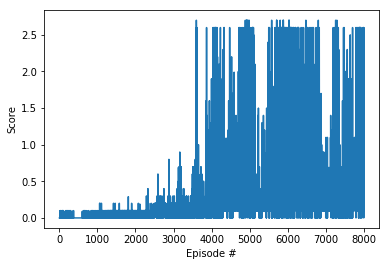

In [5]:
scores = maddpg(agent, 8000, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()